### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the datasets

In [2]:
company_list = ['Amazon_data.csv', 'Apple_data.csv', 'Google_data.csv', 'Microsoft_data.csv']
stock_data = pd.DataFrame()
for company in company_list:
    current_data = pd.read_csv(company)
    stock_data = pd.concat([stock_data, current_data])

In [3]:
stock_data.shape

(5036, 7)

In [4]:
stock_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN


### Analysing the opening prices of all the stocks

In [18]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5036 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    5036 non-null   object 
 1   open    5036 non-null   float64
 2   high    5036 non-null   float64
 3   low     5036 non-null   float64
 4   close   5036 non-null   float64
 5   volume  5036 non-null   int64  
 6   Name    5036 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 314.8+ KB


In [19]:
stock_data['date'] =  pd.to_datetime(stock_data['date'])

In [20]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5036 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    5036 non-null   datetime64[ns]
 1   open    5036 non-null   float64       
 2   high    5036 non-null   float64       
 3   low     5036 non-null   float64       
 4   close   5036 non-null   float64       
 5   volume  5036 non-null   int64         
 6   Name    5036 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 314.8+ KB


In [11]:
companies = stock_data['Name'].unique()

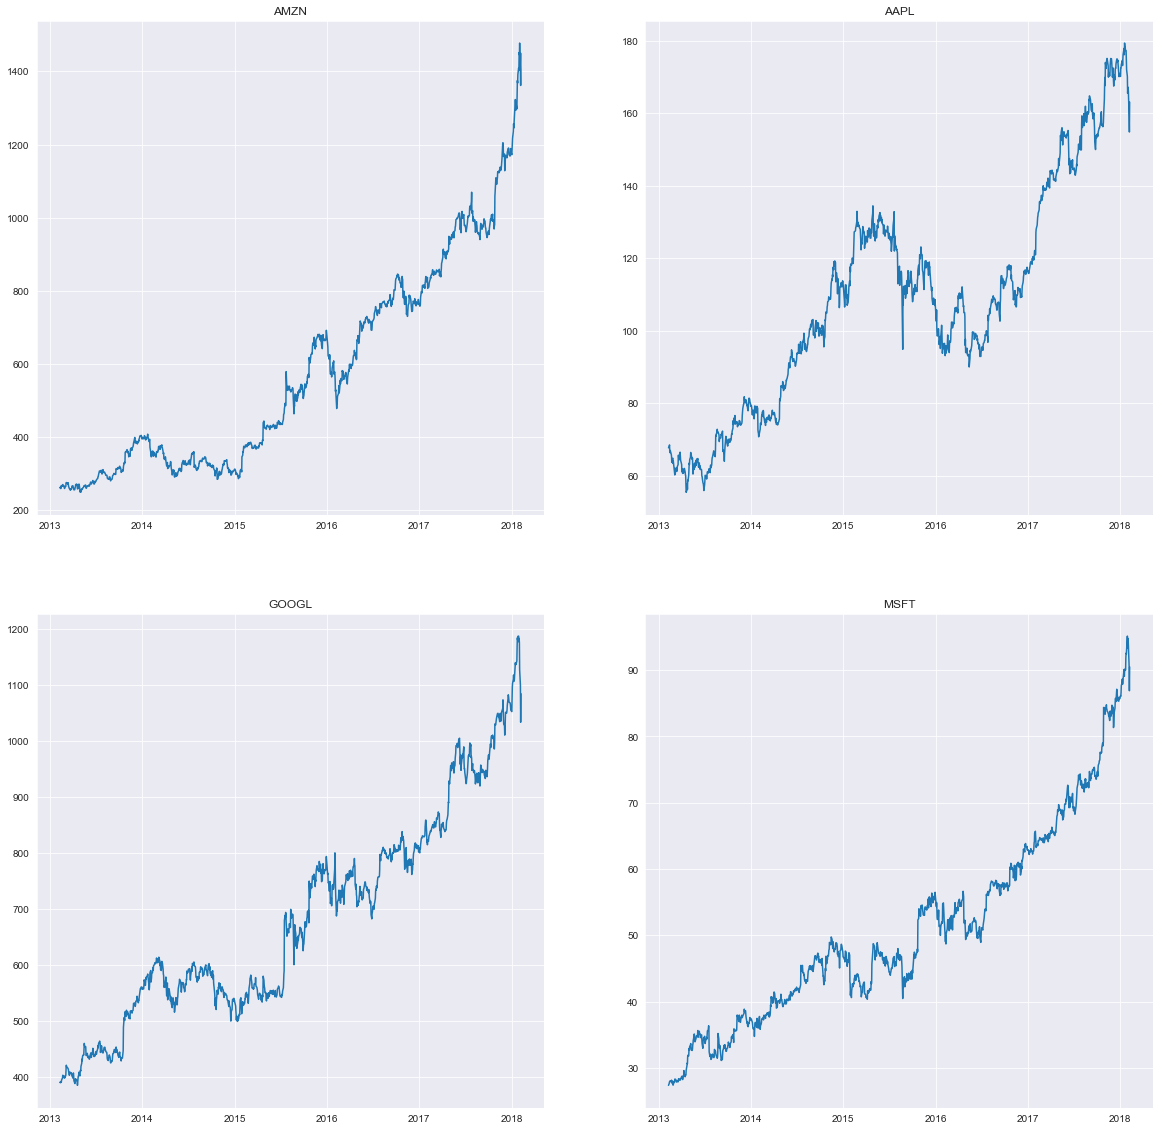

In [22]:
plt.figure(figsize= (20, 20))
for i, company in enumerate(companies, 1):
    plt.subplot(2, 2, i)
    df = stock_data[stock_data['Name'] == company]
    plt.plot(df['date'], df['open'])
    plt.title(company)

### Analysing the closing prices of all the stocks

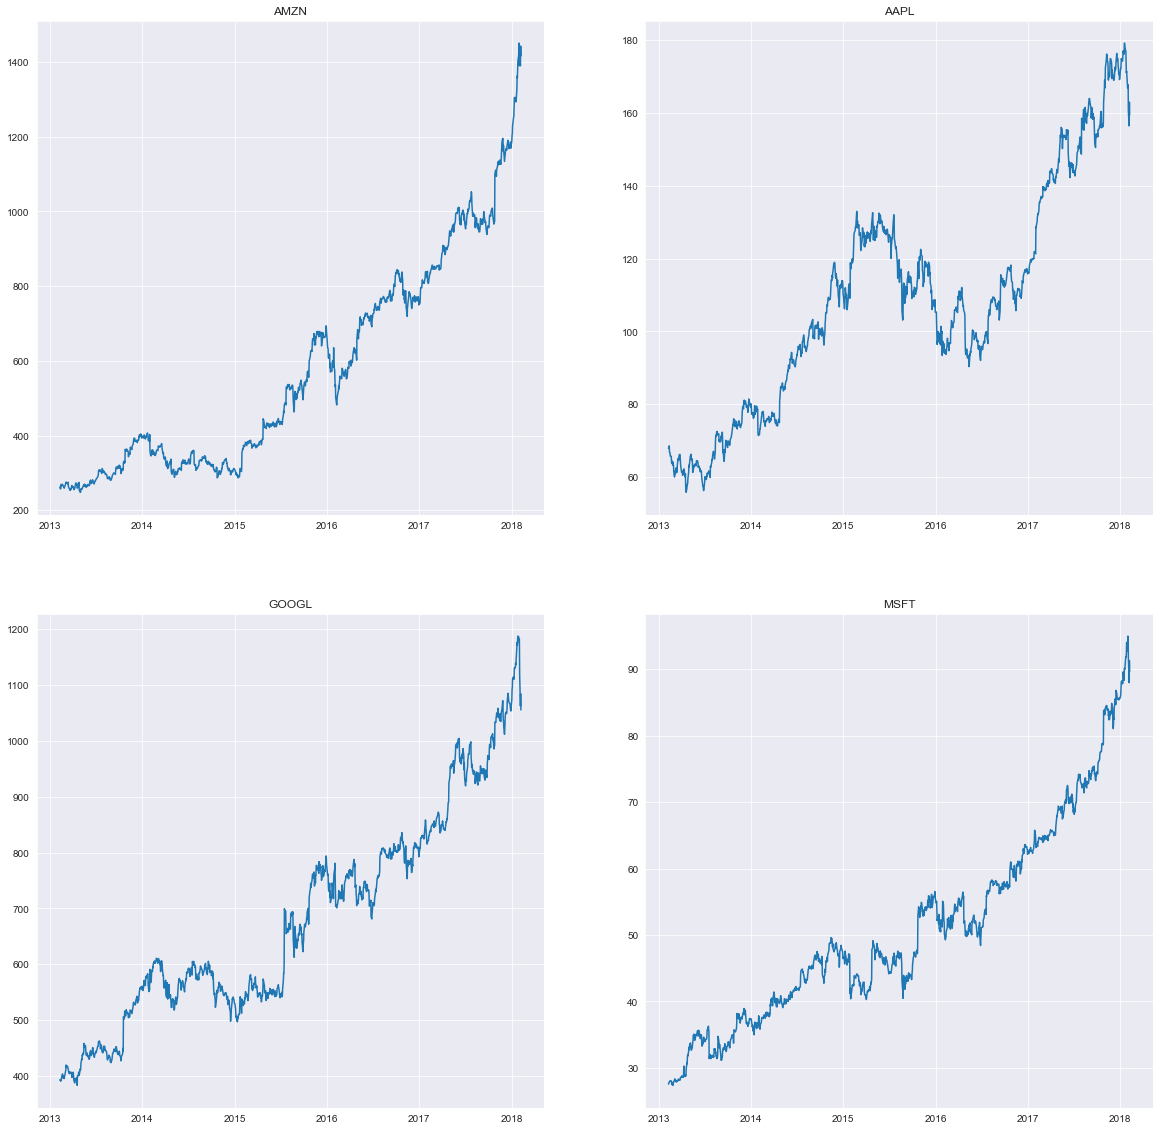

In [23]:
plt.figure(figsize= (20, 20))
for i, company in enumerate(companies, 1):
    plt.subplot(2, 2, i)
    df = stock_data[stock_data['Name'] == company]
    plt.plot(df['date'], df['close'])
    plt.title(company)

In [27]:
# plt.figure(figsize= (20, 20))
# for i, company in enumerate(companies, 1):
#     df = stock_data[stock_data['Name'] == company]
#     fig = px.line(df, x= df['date'], y= df['close'], title= company)
#     fig.show()

### Analysing total volume of stocks traded each day

In [30]:
import plotly as px
for company in companies:
    df = stock_data[stock_data['Name'] == company]
    fig = px.line(df, x= 'date', y= 'volume', title= company)
    fig.show()

### Analysing Daily Price Change in Stock

In [31]:
# Analysing for Amazon
amazon_df = pd.read_csv('Amazon_data.csv')
amazon_df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN


In [32]:
amazon_df['Daily_price_change'] = amazon_df['close']- amazon_df['open']
amazon_df.head()

,date,open,high,low,close,volume,Name,Daily_price_change
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN,0.55
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN,-5.99
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN,-0.49
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN,7.94
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN,1.87


In [33]:
amazon_df['Daily_percent_change'] = ((amazon_df['close']- amazon_df['open'])/amazon_df['close'])*100
amazon_df.head()

,date,open,high,low,close,volume,Name,Daily_price_change,Daily_percent_change
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN,0.55,0.209964
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN,-5.99,-2.328836
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN,-0.49,-0.189409
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN,7.94,2.946525
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN,1.87,0.694548


In [35]:
fig = px.line(amazon_df, x= 'date', y='Daily_percent_change', title= 'Daily Price Change in Amazon stocks')
fig.show()

### Analysing monthly mean of close feature

In [46]:
import plotly
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)
cf.go_offline()
%matplotlib inline

In [36]:
new_df = amazon_df.copy()

In [38]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  1259 non-null   object 
 1   open                  1259 non-null   float64
 2   high                  1259 non-null   float64
 3   low                   1259 non-null   float64
 4   close                 1259 non-null   float64
 5   volume                1259 non-null   int64  
 6   Name                  1259 non-null   object 
 7   Daily_price_change    1259 non-null   float64
 8   Daily_percent_change  1259 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 88.6+ KB


In [39]:
new_df['date'] = pd.to_datetime(new_df['date'])
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  1259 non-null   datetime64[ns]
 1   open                  1259 non-null   float64       
 2   high                  1259 non-null   float64       
 3   low                   1259 non-null   float64       
 4   close                 1259 non-null   float64       
 5   volume                1259 non-null   int64         
 6   Name                  1259 non-null   object        
 7   Daily_price_change    1259 non-null   float64       
 8   Daily_percent_change  1259 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 88.6+ KB


In [40]:
new_df.head()

,date,open,high,low,close,volume,Name,Daily_price_change,Daily_percent_change
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN,0.55,0.209964
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN,-5.99,-2.328836
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN,-0.49,-0.189409
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN,7.94,2.946525
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN,1.87,0.694548


In [41]:
new_df.set_index('date', inplace= True)

In [42]:
new_df.head()

,open,high,low,close,volume,Name,Daily_price_change,Daily_percent_change
date,,,,,,,,
2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN,0.55,0.209964
2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN,-5.99,-2.328836
2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN,-0.49,-0.189409
2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN,7.94,2.946525
2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN,1.87,0.694548


In [61]:
new_df['close'].resample('M').mean().iplot(theme= 'space', title = 'Monthly mean of closing prices of Amazon',
                                           xTitle= 'Date', yTitle= 'Mean of closing prices')

In [62]:
new_df['close'].resample('Y').mean().iplot(kind= 'bar', theme= 'space')

In [66]:
new_df['close'].resample('3M').mean().iplot(kind= 'bar', theme= 'space')

### Analysing the correlations between Tech Companies

In [67]:
apple = pd.read_csv('Apple_data.csv')
apple.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [68]:
amazon = pd.read_csv('Amazon_data.csv')
amazon.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN


In [69]:
google = pd.read_csv('Google_data.csv')
google.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,390.4551,393.7283,390.1698,393.0777,6031199,GOOGL
1,2013-02-11,389.5892,391.8915,387.2619,391.6012,4330781,GOOGL
2,2013-02-12,391.2659,394.3440,390.0747,390.7403,3714176,GOOGL
3,2013-02-13,390.4551,393.0677,390.3750,391.8214,2393946,GOOGL
4,2013-02-14,390.2549,394.7644,389.2739,394.3039,3466971,GOOGL


In [70]:
microsoft = pd.read_csv('Microsoft_data.csv')
microsoft.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [71]:
close_df = pd.DataFrame()

In [73]:
close_df['apple'] = apple['close']
close_df['amazon'] = amazon['close']
close_df['google'] = google['close']
close_df['microsoft'] = microsoft['close']

In [74]:
close_df.head()

,apple,amazon,google,microsoft
0,67.8542,261.95,393.0777,27.55
1,68.5614,257.21,391.6012,27.86
2,66.8428,258.70,390.7403,27.88
3,66.7156,269.47,391.8214,28.03
4,66.6556,269.24,394.3039,28.04


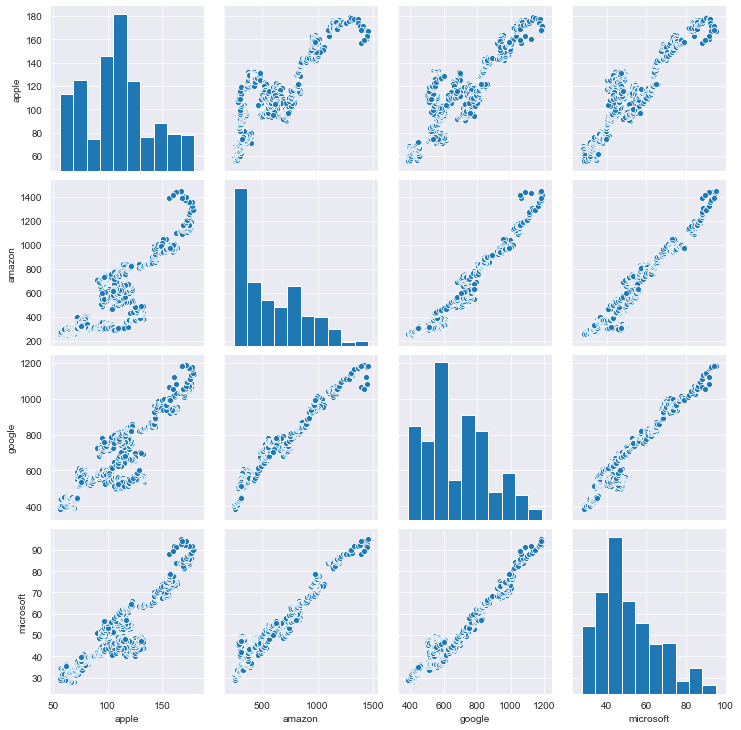

In [75]:
sns.pairplot(close_df)

Here we found that if Amazon closing prices increases google and microsoft closing prices are also increases and viceversa.

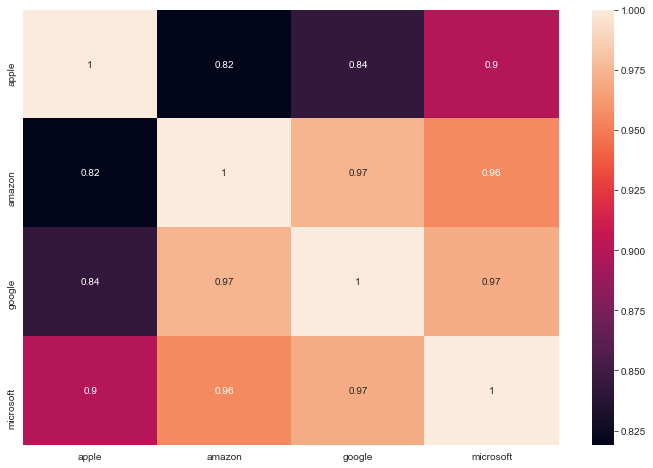

In [85]:
plt.figure(figsize= (12, 8))
sns.heatmap(close_df.corr(), annot= True)

### Analysing Daily return of each stock and How they are correlated

In [86]:
data = pd.DataFrame()

In [87]:
data['apple_change'] = ((apple['close'] - apple['open'])/apple['close'])*100
data['amazon_change'] = ((amazon['close'] - amazon['open'])/amazon['close'])*100
data['google_change'] = ((google['close'] - google['open'])/google['close'])*100
data['microsoft_change'] = ((microsoft['close'] - microsoft['open'])/microsoft['close'])*100

In [88]:
data.head()

,apple_change,amazon_change,google_change,microsoft_change
0,0.206325,0.209964,0.667196,0.725953
1,0.714688,-2.328836,0.513788,0.753769
2,-2.481344,-0.189409,-0.134514,0.000000
3,-0.042869,2.946525,0.348705,0.356761
4,0.443624,0.694548,1.026873,0.427960


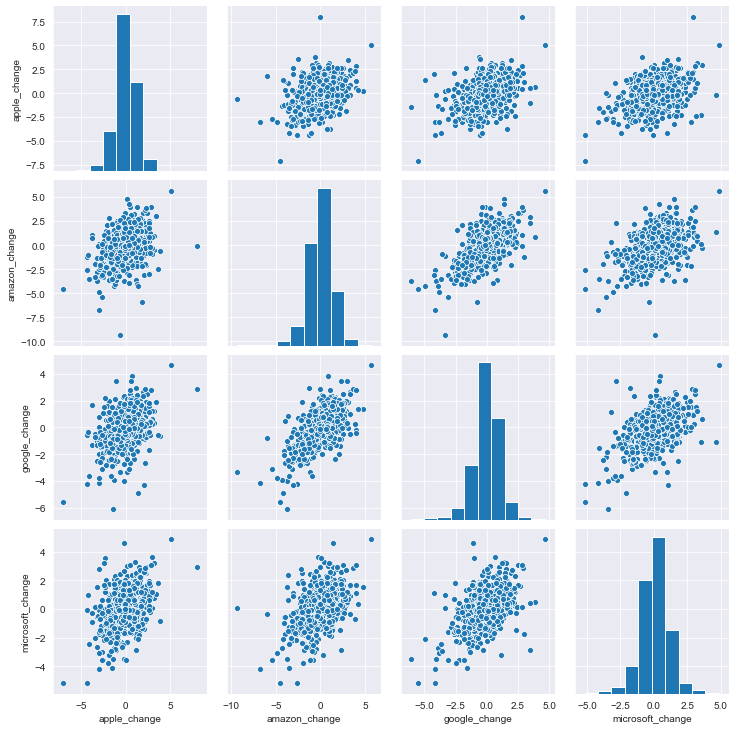

In [89]:
sns.pairplot(data)

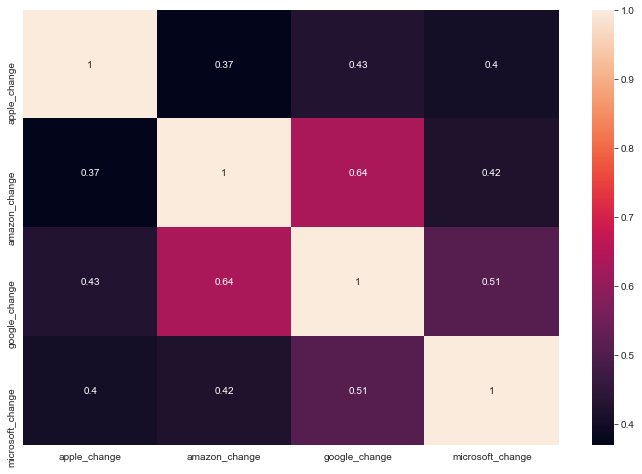

In [90]:
plt.figure(figsize= (12, 8))
sns.heatmap(data.corr(), annot= True)

### Value at Risk Analysis with different Tech Companies

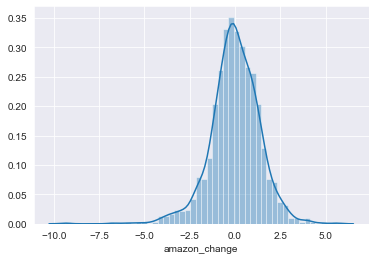

In [91]:
sns.distplot(data['amazon_change'])

In [92]:
data['amazon_change'].std()

# -1.35 to +1.35, we have 68% of entire data

1.35867860994955

In [93]:
data['amazon_change'].std()*2

# -2.71 to +2.71 we have 95% of entire data

2.7173572198991

In [94]:
data['amazon_change'].std()*3

# -4.07 to +4.07 we have 99.7% of entire data (or) there is a 99.7% chance that our daily return 
# will lie in a range of  -4.07 to +4.07.

4.07603582984865

In [95]:
data['amazon_change'].quantile(0.1)

# 90% of the time worst daily loss will not exceed -1.42

-1.5247436499501363

In [96]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
apple_change,1259.0,-0.000215,1.187138,-7.104299,-0.658021,0.042230,0.715427,8.000388
amazon_change,1259.0,-0.000398,1.358679,-9.363077,-0.738341,-0.002623,0.852568,5.640265
google_change,1259.0,-0.028349,1.052191,-6.107290,-0.575799,-0.004508,0.624730,4.652214
microsoft_change,1259.0,0.076404,1.059260,-5.177618,-0.509241,0.061069,0.703264,4.861491
